# Data Preparation Week 3 and 4
## Joshua Greenert
## DSC540-T301 Data Preparation
## 9/11/2022

In [1]:
# Data Wrangling with Python: Activity 5, page 116
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read in the boston_housing data.
df_housing = pd.read_csv("Boston_housing.csv")

# Check the first 10 records.
df_housing.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [3]:
# Get the total number of records.
print(f"The total number of rows are: {len(df_housing.index)}")

The total number of rows are: 506


In [4]:
# Create a smaller dataframe without the columns CHAS, NOX, B, and LSTAT
df_housing_small = df_housing[['CRIM', 'ZN', 'INDUS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'PRICE']]

# Check the last seven records.
df_housing_small.tail(7)

,CRIM,ZN,INDUS,RM,AGE,DIS,RAD,TAX,PTRATIO,PRICE
499,0.17783,0.0,9.69,5.569,73.5,2.3999,6,391,19.2,17.5
500,0.22438,0.0,9.69,6.027,79.7,2.4982,6,391,19.2,16.8
501,0.06263,0.0,11.93,6.593,69.1,2.4786,1,273,21.0,22.4
502,0.04527,0.0,11.93,6.120,76.7,2.2875,1,273,21.0,20.6
503,0.06076,0.0,11.93,6.976,91.0,2.1675,1,273,21.0,23.9
504,0.10959,0.0,11.93,6.794,89.3,2.3889,1,273,21.0,22.0
505,0.04741,0.0,11.93,6.030,80.8,2.5050,1,273,21.0,11.9


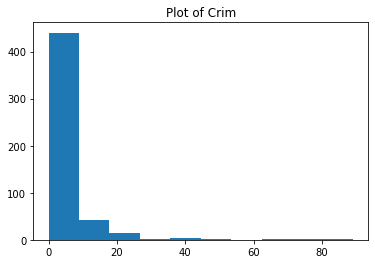

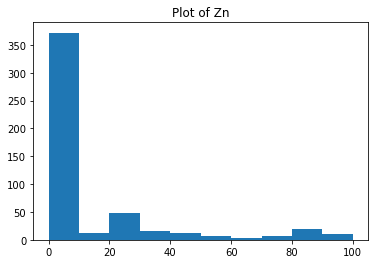

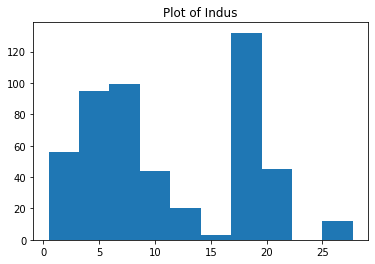

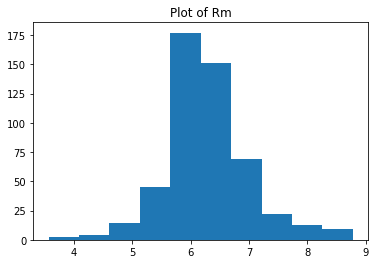

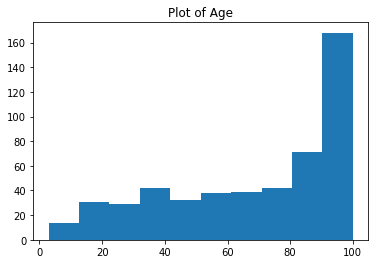

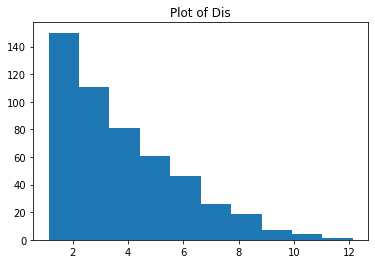

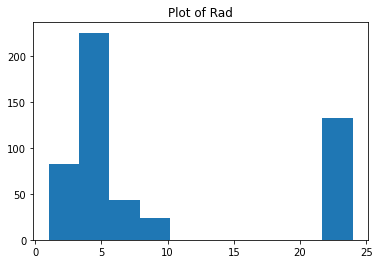

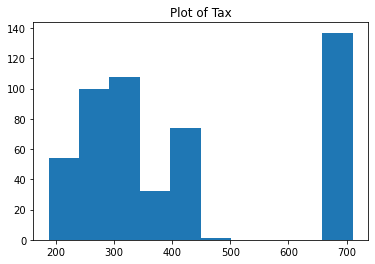

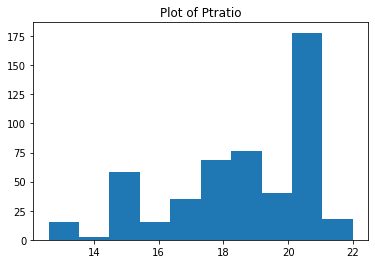

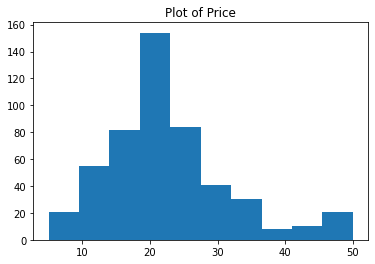

In [5]:
# Plot the histogram of all the columns in the dataframe.
# Plot them all at once using a for loop.  Try to add a unique title to a plot.
for i in df_housing_small.columns:
    plt.title("Plot of " + i.title())
    plt.hist(df_housing_small[i])
    plt.show()

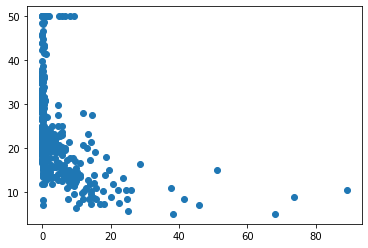

In [6]:
# Create a scatter plot of crime rate verse price.
plt.scatter(df_housing_small['CRIM'], df_housing_small['PRICE'])
plt.show()

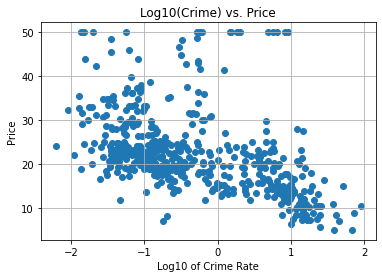

In [7]:
# Plot using log10(crime) verse price.
plt.scatter(np.log10(df_housing_small['CRIM']), df_housing_small['PRICE'])
plt.title("Log10(Crime) vs. Price")
plt.xlabel("Log10 of Crime Rate")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [8]:
# Calculate mean rooms per dwelling, median age, mean distances to five boston employment centers, and the percentage of houses
# with a low price(<20,000)
print(f"Mean Rooms Per Dwelling: {df_housing_small['RM'].mean()}")
print(f"Median Age: {df_housing_small['AGE'].median()}")
print(f"Mean Distances To Employment Centers: {df_housing_small['DIS'].mean()}")
print(f"Houses With a Low Price: {(df_housing_small['PRICE'] < 20).mean() * 100}")

Mean Rooms Per Dwelling: 6.284634387351787
Median Age: 77.5
Mean Distances To Employment Centers: 3.795042687747034
Houses With a Low Price: 41.50197628458498


In [12]:
# Data Wrangling with Python: Activity 6, page 171
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Read the adult income dataset.
df_adult_income = pd.read_csv('adult_income_data.csv')
df_adult_income.head(5)

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,Female,0,0,40,United-States,<=50K


In [14]:
# Create a script that will read a text file line by line.
headers = []
with open('adult_income_names.txt') as file:
    for line in file:
        file.readline()
        name = line.split(':')[0]
        headers.append(name)

In [27]:
# Add a name of Income to the response variable to the dataset.
headers.append('Income')

# Set the headers to the dataframe.
df_adult_income_updated = pd.read_csv('adult_income_data.csv', names = headers)
df_adult_income_updated.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [28]:
# Find the missing values
df_adult_income.isna().sum()

39                0
 State-gov        0
77516             0
 Bachelors        0
13                0
 Never-married    0
 Adm-clerical     0
 Not-in-family    0
 Male             0
2174              0
0                 0
40                0
 United-States    0
 <=50K            0
dtype: int64

In [30]:
# Create a dataframe with only age, education, and occupation by subsetting.
new_df = df_adult_income_updated[['age', 'education', 'occupation']]
new_df.head(5)

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
3,53,11th,Handlers-cleaners
4,28,Bachelors,Prof-specialty


<AxesSubplot:>

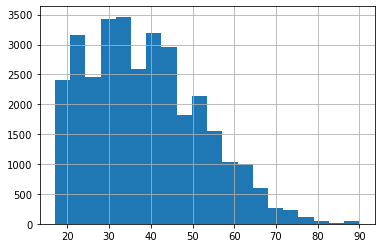

In [31]:
# Plot a histogram of age with a bin size of 20
new_df['age'].hist(bins = 20)

In [33]:
# Create a function to strip the whitespace characters.
def strip_whitespace(string):
    return string.strip()

In [34]:
# Use the apply method to apply this function to all the columns with string values.
# Create a new column, copy the values from this new column to the old column, then drop the column.
new_df['education_stripped']= df_adult_income_updated['education'].apply(strip_whitespace)
new_df['education']= new_df['education_stripped']
new_df.drop(labels=['education_stripped'],axis=1)

# Occupation column
new_df['occupation_stripped']= df_adult_income_updated['occupation'].apply(strip_whitespace)
new_df['occupation']= new_df['occupation_stripped']
new_df.drop(labels=['occupation_stripped'],axis=1)

C:\Users\Josh\AppData\Local\Temp\ipykernel_16996\1068264966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['education_stripped']= df_adult_income_updated['education'].apply(strip_whitespace)
C:\Users\Josh\AppData\Local\Temp\ipykernel_16996\1068264966.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['education']= new_df['education_stripped']
C:\Users\Josh\AppData\Local\Temp\ipykernel_16996\1068264966.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

,age,education,occupation,education_stripped
0,39,Bachelors,Adm-clerical,Bachelors
1,50,Bachelors,Exec-managerial,Bachelors
2,38,HS-grad,Handlers-cleaners,HS-grad
3,53,11th,Handlers-cleaners,11th
4,28,Bachelors,Prof-specialty,Bachelors
...,...,...,...,...
32556,27,Assoc-acdm,Tech-support,Assoc-acdm
32557,40,HS-grad,Machine-op-inspct,HS-grad
32558,58,HS-grad,Adm-clerical,HS-grad
32559,22,HS-grad,Adm-clerical,HS-grad


In [39]:
new_df.drop(labels=['occupation_stripped'],axis=1, inplace=True)
new_df.drop(labels=['education_stripped'],axis=1, inplace=True)

C:\Users\Josh\AppData\Local\Temp\ipykernel_16996\3033624558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(labels=['occupation_stripped'],axis=1, inplace=True)
C:\Users\Josh\AppData\Local\Temp\ipykernel_16996\3033624558.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df.drop(labels=['education_stripped'],axis=1, inplace=True)


In [40]:
# Find the number of people who are aged between 30 and 50.
age_filtered_df = new_df[(new_df['age'] >= 30) & (new_df['age'] <= 50)]
age_filtered_df.head(5)

,age,education,occupation
0,39,Bachelors,Adm-clerical
1,50,Bachelors,Exec-managerial
2,38,HS-grad,Handlers-cleaners
5,37,Masters,Exec-managerial
6,49,9th,Other-service


In [44]:
# Group the records based on age and education to find how the mean age is distributed.
age_filtered_df.groupby(['age', 'education']).mean()

C:\Users\Josh\AppData\Local\Temp\ipykernel_16996\3350793948.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  age_filtered_df.groupby(['age', 'education']).mean()


Empty DataFrame
Columns: []
Index: [(30, 10th), (30, 11th), (30, 12th), (30, 5th-6th), (30, 7th-8th), (30, 9th), (30, Assoc-acdm), (30, Assoc-voc), (30, Bachelors), (30, Doctorate), (30, HS-grad), (30, Masters), (30, Preschool), (30, Prof-school), (30, Some-college), (31, 10th), (31, 11th), (31, 12th), (31, 1st-4th), (31, 5th-6th), (31, 7th-8th), (31, 9th), (31, Assoc-acdm), (31, Assoc-voc), (31, Bachelors), (31, Doctorate), (31, HS-grad), (31, Masters), (31, Preschool), (31, Prof-school), (31, Some-college), (32, 10th), (32, 11th), (32, 12th), (32, 1st-4th), (32, 5th-6th), (32, 7th-8th), (32, 9th), (32, Assoc-acdm), (32, Assoc-voc), (32, Bachelors), (32, Doctorate), (32, HS-grad), (32, Masters), (32, Preschool), (32, Prof-school), (32, Some-college), (33, 10th), (33, 11th), (33, 12th), (33, 1st-4th), (33, 5th-6th), (33, 7th-8th), (33, 9th), (33, Assoc-acdm), (33, Assoc-voc), (33, Bachelors), (33, Doctorate), (33, HS-grad), (33, Masters), (33, Preschool), (33, Prof-school), (33, Some-college), (34, 10th), (34, 11th), (34, 12th), (34, 1st-4th), (34, 5th-6th), (34, 7th-8th), (34, 9th), (34, Assoc-acdm), (34, Assoc-voc), (34, Bachelors), (34, Doctorate), (34, HS-grad), (34, Masters), (34, Preschool), (34, Prof-school), (34, Some-college), (35, 10th), (35, 11th), (35, 12th), (35, 1st-4th), (35, 5th-6th), (35, 7th-8th), (35, 9th), (35, Assoc-acdm), (35, Assoc-voc), (35, Bachelors), (35, Doctorate), (35, HS-grad), (35, Masters), (35, Prof-school), (35, Some-college), (36, 10th), (36, 11th), (36, 12th), (36, 1st-4th), (36, 5th-6th), (36, 7th-8th), ...]

[327 rows x 0 columns]

In [50]:
# Group by occupation and show the summary stats of age.  Find which profession has the oldest workers on average
# and which profession has it's largest share of the workforce above the 75th percentile.
occupation_summary = new_df.groupby(['occupation']).describe()['age']
occupation_summary.sort_values(by = 'mean', ascending = False)
print('According to the mean, the profession with the oldest workers are Exec-managerial, Priv-house-serv, and Farming-fishing')

According to the mean, the profession with the oldest workers are Exec-managerial, Priv-house-serv, and Farming-fishing


In [53]:
# which profession has it's largest share of the workforce above the 75th percentile.
occupation_summary.sort_values(by = 'count', ascending = False)
print('According to the count,  the largest share of the workforce are Prof-specialty, Craft-repair, and Exec-managerial')

According to the count,  the largest share of the workforce are Prof-specialty, Craft-repair, and Exec-managerial


In [57]:
# Use subset and groupby to find outliers
occupation_summary.sort_values(by = 'mean', ascending = False)
print('Outliers are visible with a minor adjustment to the formula.  Armed-forces appear to have a low amount of count.' + \
     'Additionally, the priv-house-serv profession appears to be missing data while the ? profession has no tit')

Outliers are visible with a minor adjustment to the formula.  Armed-forces appear to have a low amount of count.Additionally, the priv-house-serv profession appears to be missing data while the ? profession has no title.


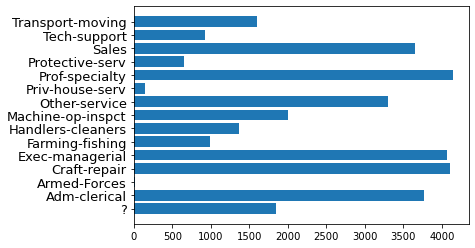

In [59]:
# Plot the values on a bar chart.
plt.barh(y = occupation_summary.index, width = occupation_summary['count'])
plt.yticks(fontsize=13)
plt.show()

In [66]:
# Merge the data using common keys.
# Create two separate dataframes.
df_1 = df_adult_income_updated[['age','occupation','education']].sample(5,random_state=101)
df_2 = new_df[['education','age','occupation']].sample(5,random_state=101)

# Merge the dataframes.  All of these are bad columns to use for merging since they don't have a primary key.
df_merged = pd.merge(df_1,df_2,on='age',how='inner').drop_duplicates()
df_merged.head(10)

,age,occupation_x,education_x,education_y,occupation_y
0,51,Machine-op-inspct,HS-grad,HS-grad,Machine-op-inspct
1,19,Sales,11th,11th,Sales
2,40,Exec-managerial,HS-grad,HS-grad,Exec-managerial
3,17,Handlers-cleaners,10th,10th,Handlers-cleaners
4,61,Craft-repair,7th-8th,7th-8th,Craft-repair


In [67]:
# Create a series and practice basic arithmetic steps.
series1 = pd.Series([7.3, -2.5, 3.4, 1.5], index = ['a', 'c', 'd', 'e'] )
series2 = pd.Series([-2.1, 3.6, -1.5, 4, 3.1], index = ['a', 'c', 'e', 'f', 'g'])

print(series1.add(series2))
print(series2.subtract(series1))


a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64
a   -9.4
c    6.1
d    NaN
e   -3.0
f    NaN
g    NaN
dtype: float64
